In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/MyDrive/BME/Lab-513/Training/Machine-learning/1.linear-regression'

/content/gdrive/MyDrive/BME/Lab-513/Training/Machine-learning/1.linear-regression


In [4]:
!ls

1.price-house-prediction  ames.csv


In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [6]:
dataset = os.path.join('dataset', 'ames.csv')
df = pd.read_csv('ames.csv', index_col = 0)
df.head()

,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,...,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Gr.Liv.Area,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


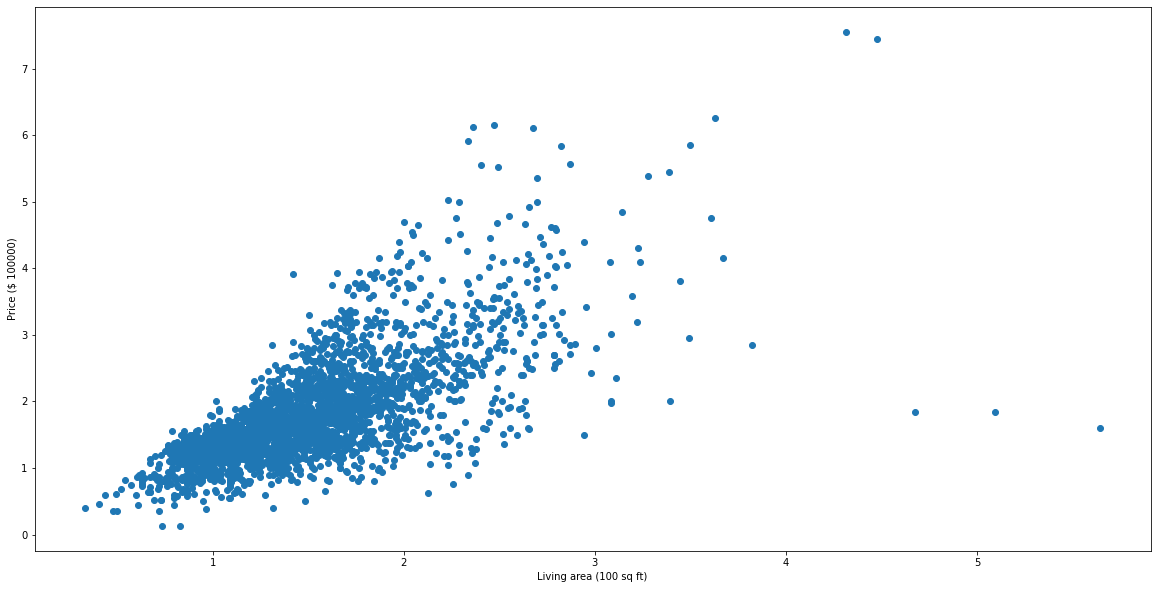

In [7]:
living_area = df['Gr.Liv.Area'] / 1000
price = df['SalePrice'] / 100000

'''
coord = {'x_min': 1.1, 'x_max': 4., 'y_min': 1, 'y_max': 6}
fig, ax = plt.subplots()
ax.set_xlim((coord["x_min"], coord["x_max"]))
ax.set_ylim((coord["y_min"], coord["y_max"]))
ax.scatter(x = living_area, y = price)
plt.show()
'''
plt.figure(figsize = (20,10))
plt.scatter(x = living_area, y = price)
plt.xlabel('Living area (100 sq ft)')
plt.ylabel('Price ($ 100000)')
plt.show()


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 1 to 2930
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS.SubClass      2930 non-null   int64  
 2   MS.Zoning        2930 non-null   object 
 3   Lot.Frontage     2440 non-null   float64
 4   Lot.Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot.Shape        2930 non-null   object 
 8   Land.Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot.Config       2930 non-null   object 
 11  Land.Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition.1      2930 non-null   object 
 14  Condition.2      2930 non-null   object 
 15  Bldg.Type        2930 non-null   object 
 16  House.Style      2930 non-null   object 
 17  Overall.Qual  

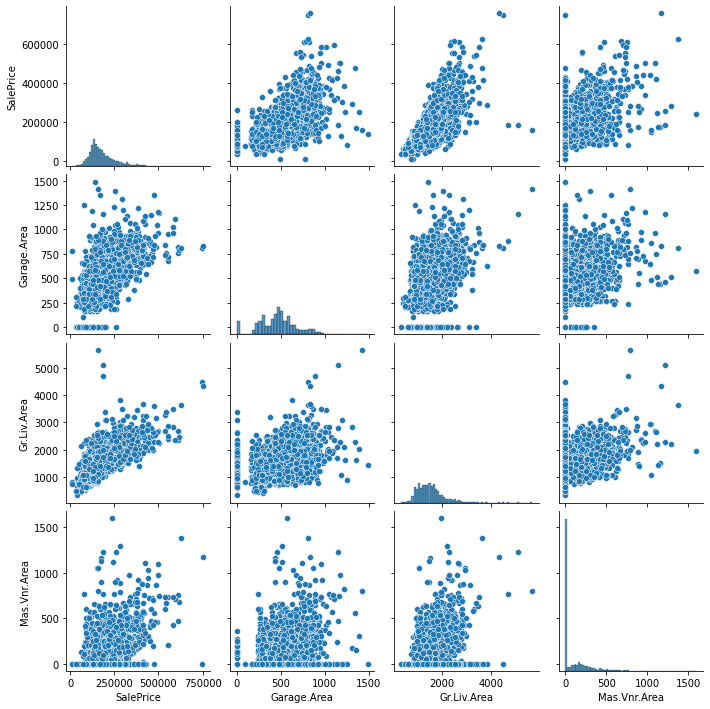

In [14]:
sns.pairplot(df[['SalePrice', 'Garage.Area', 'Gr.Liv.Area', 'Mas.Vnr.Area']])

In [16]:
df_sub = df[['Gr.Liv.Area', 'Garage.Area', 'Mas.Vnr.Area', 'SalePrice']]

In [17]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 1 to 2930
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gr.Liv.Area   2930 non-null   int64  
 1   Garage.Area   2929 non-null   float64
 2   Mas.Vnr.Area  2907 non-null   float64
 3   SalePrice     2930 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 114.5 KB


In [18]:
df_sub.shape

(2930, 4)

In [22]:
df_sub = df_sub.dropna()

In [23]:
df_sub.shape

(2906, 4)

### 1. Linear regression with least square

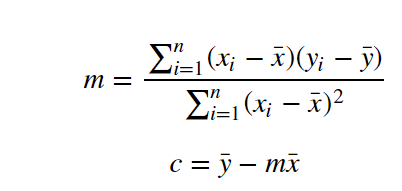

In [54]:
y = df_sub['SalePrice'].values
X = df_sub[['Gr.Liv.Area', 'Garage.Area', 'Mas.Vnr.Area']].values

In [65]:
y = np.expand_dims(y , 1)

In [55]:
mean_X = np.mean(X, axis = 0)
mean_y = np.mean(y)

In [66]:
nominator = np.sum((X - mean_X) * (y -  mean_y), axis = 0)

In [67]:
denominator = np.sum((X - mean_X) ** 2, axis = 0)

In [69]:
m_1 = nominator / denominator

In [96]:
c_1 = mean_y - np.sum(m_1 * mean_X)

In [97]:
print(f'm_1 = {m_1}')
print(f'c_1 = {c_1}')

m_1 = [111.55924035 237.12509114 226.47063939]
c_1 = -121831.283532545


### 2. Linear regression with Gradient Descent

In [105]:
# Building the model
m_2 = np.array([[0], [0], [0]])
c_2 = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent
n = X.shape[0] # number of sample 

In [75]:
# loss function using MSE

In [106]:
for i in range(epochs): 
    y_pred = np.dot(X, m) + c_2  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (y - y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y - y_pred)  # Derivative wrt c
    m_2 = m - L * D_m  # Update m
    c_2 = c - L * D_c  # Update c
    

In [107]:
print(f'm_2 = {m_2}')
print(f'c_2 = {c_2}')

m_2 = [[59763.28436515 19231.30459541  5129.70464625]
 [59763.28436515 19231.30459541  5129.70464625]
 [59763.28436515 19231.30459541  5129.70464625]]
c_2 = [36.07086745]


### 3. Linear regression by Sklearn

In [79]:
from sklearn import linear_model

In [80]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [81]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
m_3 = regr.coef_
c_3 = regr.intercept_

In [87]:
print(f'm_3 = {m_3}')
print(f'c_3 = {c_3}')

m_3 = [[ 73.10188456 127.03392823  86.03587186]]
c_3 = [2097.34367172]
